<a href="https://colab.research.google.com/github/CR-Reyes/Fiscomp/blob/master/MatrixDifferentialOperators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pozo de potencial finito en 1D

Se resolverá numéricamente el problema del pozo de potencial finito:
$$\hat{H}\Psi=E\Psi$$

Donde $H = -\frac{h^2}{2m}\Delta + V(x)$ siendo que $V(x)$ es $C$ en todos lados menos cuando $-a<x<a$.

Se uilizará una derivación con operadores matriciales construidos a través de la derivada numérica central de primer orden:
$$f'(x) = \frac{f(x_{+1})-f(x_{-1})}{h}$$

In [1]:
# importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
import sympy

A continuación, defino una función para generar una matriz $n\times n$ que funcione como operador diferencial de segundo orden respecto a la posición. En una dimensión este operador es equivalente al Laplaciano que forma parte del Hamiltoniano, junto con el potencial $V(x)$.

In [2]:
# Natural -> Matriz NxN
# produce el operador matricial de segunda derivada para
#   vectores de tamaño N 
def dy2d2x(n):
    matrix = np.zeros([n, n])
    diagonal = np.ones(n)
    matrix += np.diag(diagonal[1:], -1)
    matrix += np.diag(diagonal[1:], 1)
    matrix += np.diag(diagonal * 2, 0)
    return matrix

V = np.ones((1, n))
mid = round(n/2)
space = 300
V[0,mid-space:mid+space] = 0

H = -dy2d2x(1000) + np.diag(V[0])
print("This is the second differential operator")
print(Diff)

This is the second differential operator
[[-2.  1.  0. ...  0.  0.  1.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 1.  0.  0. ...  0.  1. -2.]]


La siguiente celda hace el trabajo computacional más intenso al obtener los eigenvalores y eigenfunciones de la matriz que representa al Hamiltoniano.

In [3]:
#producimos eigenvalores y eigenvectores de una matriz hermitiana
eigval, eigvect = la.eigh(H)

Finalmente, al graficar las eigenfunciones obtenidas en el paso anterior producimos la función de estado estacionario esperada, tal como se espera para un pozo de potencial.

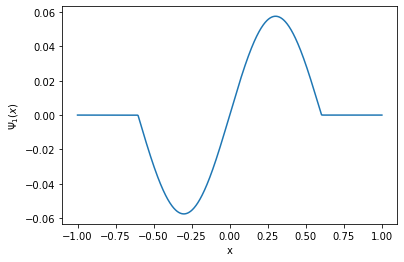

In [8]:
x = np.linspace(-1, 1, np.size(eigvect[:, 0]))
plt.plot(x, eigvect[:, 1]) #se toma el segundo estado estacionario
plt.xlabel("x")
plt.ylabel("$\Psi_1(x)$")
plt.show()